In [6]:
from paramsEllipses import ParamsEllipses
import cupy as cp
#import numpy as cp
from matplotlib import pyplot as plt

In [13]:
class Ellipse:   
    def __init__(self, size,axis_minor, axis_major,min_intensity,max_intensity,mov_x,mov_y,angle,sigma):
        self.data = self.__get__(size,axis_minor,axis_major,min_intensity,max_intensity,mov_x,mov_y,angle,sigma);
    
    
    def normalize(self,figure):
        figure = figure - cp.min(figure)
        if (cp.max(figure) == 0):
            figure = figure/0.000001
        else:
            figure = figure/cp.max(figure)
        return figure
    
    def __get__(self,size,axis_minor, axis_major,min_intensity,max_intensity,mov_x,mov_y,angle,sigma):
        X=cp.reshape(cp.arange(0,size),(1,size))
        X=cp.reshape(cp.arange(0,size),(1,size))
        Y=cp.reshape(cp.arange(0,size),(size,1))
        X=X-size/2 + mov_x
        Y=Y-size/2 + mov_y
        c=cp.cos(angle)
        s=cp.sin(angle)
        XX=X*c + Y*s # para no sobre-escribir X
        YY=X*s - Y*c
        X=XX
        Y=YY
        Z=cp.sqrt(((X/axis_minor)**2+((Y/axis_major)**2)))
        Z= cp.exp(-Z**2/2/sigma**2)
        ZZ =cp.copy(Z)
        Z[ZZ<min_intensity]=0
        Z[ZZ>max_intensity]=0
        Z=self.normalize(Z)
        return Z
    
    def view(self):
        plt.imshow(cp.asnumpy(self.data))
        #plt.imshow(self.data)

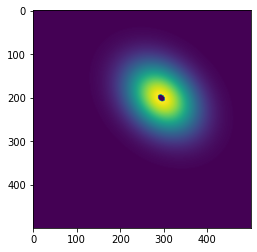

In [14]:
#from paramsEllipses import ParamsEllipses 
#params= ParamsEllipses(500)
#size_figure,axis_minor,axis_major,min_value_intensity, max_value_intensity,mov_x,moy_y,angle,sigma= params.get_params_random(8000)
#elipse= Ellipse(size_figure,axis_minor,axis_major,min_value_intensity, max_value_intensity,mov_x,moy_y,angle,sigma )
#elipse.view()